<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Fine_Tuning_Final_proposed_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [3]:
df = pd.read_csv("/content/43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [4]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


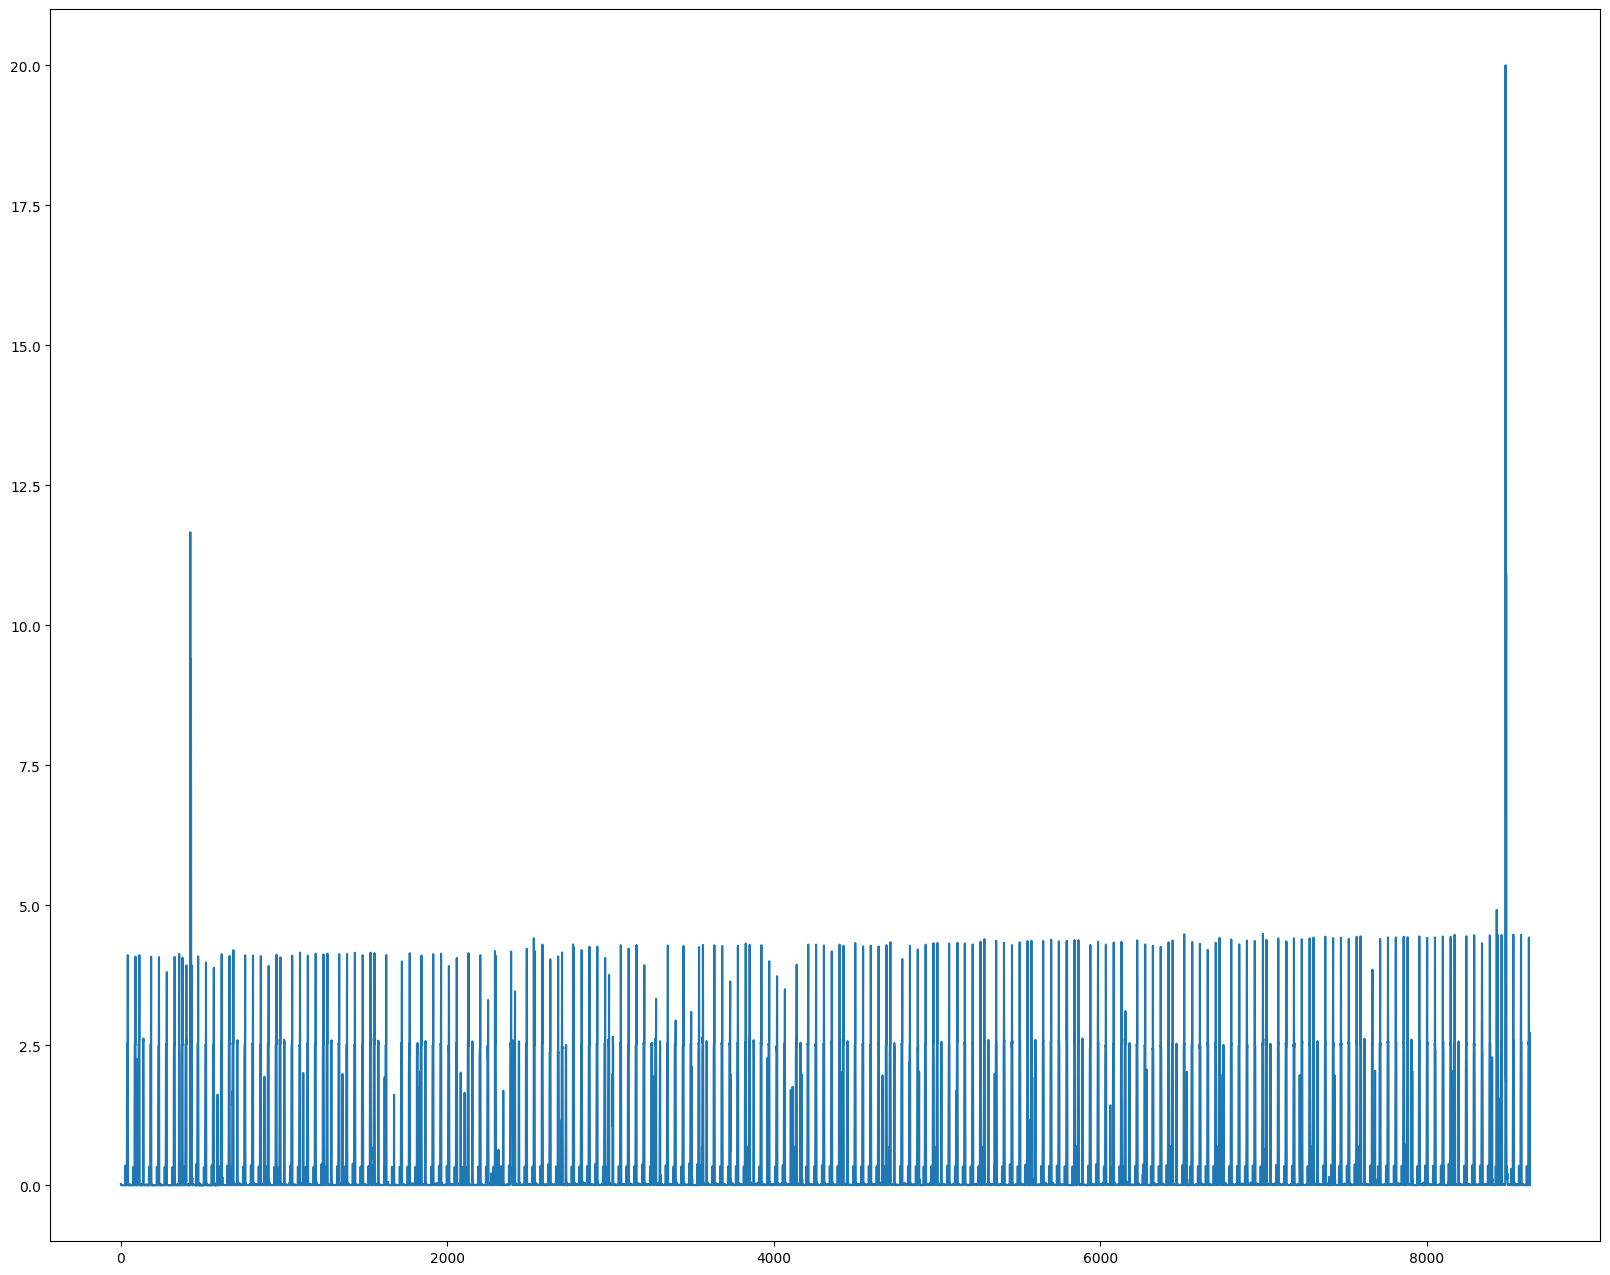

In [5]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [7]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My first model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.GRU(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu")),  # Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My best model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu",return_sequences=True)),
        tf.keras.layers.GRU(64,activation="relu"),# Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # ebti model
    def create_model(seq_size):
      model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                          strides=1, padding="causal",
                          activation="relu",
                          input_shape=[None, seq_size]),
      tf.keras.layers.Bidirectional(LSTM(64, activation='relu',return_sequences=True)),
      tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
      tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
      tf.keras.layers.GRU(64,activation="relu", return_sequences=True),
      tf.keras.layers.LSTM(50,activation="relu"),
      tf.keras.layers.Dense(1,'linear')])
      model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
      return model

final model evaluation

In [22]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00295, saving model to best_model.h5
88/88 - 13s - loss: 0.0025 - mae: 0.0336 - mse: 0.0025 - val_loss: 0.0030 - val_mae: 0.0372 - val_mse: 0.0030 - 13s/epoch - 150ms/step
Epoch 2/300

Epoch 2: val_mse improved from 0.00295 to 0.00106, saving model to best_model.h5
88/88 - 1s - loss: 0.0017 - mae: 0.0253 - mse: 0.0017 - val_loss: 0.0011 - val_mae: 0.0142 - val_mse: 0.0011 - 1s/epoch - 15ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00106 to 0.00100, saving model to best_model.h5
88/88 - 1s - loss: 7.6873e-04 - mae: 0.0127 - mse: 7.6873e-04 - val_loss: 9.9669e-04 - val_mae: 0.0117 - val_mse: 9.9669e-04 - 1s/epoch - 15ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00100 to 0.00092, saving model to best_model.h5
88/88 - 1s - loss: 7.2899e-04 - mae: 0.0122 - mse: 7.2899e-04 - val_loss: 9.2106e-04 - val_mae: 0.0120 - val_mse: 9.2106e-04 - 1s/epoch - 13ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00092 to 0.00087, s

In [14]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.03461, saving model to best_model.h5
101/101 - 8s - loss: 0.0025 - mae: 0.0335 - mse: 0.0025 - val_loss: 0.0032 - val_mae: 0.0346 - val_mse: 0.0032 - 8s/epoch - 76ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03461 to 0.03237, saving model to best_model.h5
101/101 - 1s - loss: 0.0025 - mae: 0.0341 - mse: 0.0025 - val_loss: 0.0032 - val_mae: 0.0324 - val_mse: 0.0032 - 875ms/epoch - 9ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.03237
101/101 - 1s - loss: 0.0025 - mae: 0.0339 - mse: 0.0025 - val_loss: 0.0032 - val_mae: 0.0375 - val_mse: 0.0032 - 771ms/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.03237 to 0.01275, saving model to best_model.h5
101/101 - 1s - loss: 0.0017 - mae: 0.0247 - mse: 0.0017 - val_loss: 0.0012 - val_mae: 0.0127 - val_mse: 0.0012 - 833ms/epoch - 8ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01275 to 0.01136, saving model to best_model.h5
101/101 - 1s - loss: 7.1469e-04 - mae: 0.0122 - mse: 7.1469e-04 - val_loss: 0.0011 - val_mae: 0.0114 - val_mse: 0.0011 - 752ms/epoch - 7ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01136
101/101 - 1s - loss: 6.9496e-04 - mae: 0.0118 - mse: 6.9496e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.03446
101/101 - 1s - loss: 0.0025 - mae: 0.0338 - mse: 0.0025 - val_loss: 0.0032 - val_mae: 0.0353 - val_mse: 0.0032 - 781ms/epoch - 8ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.03446 to 0.01263, saving model to best_model.h5
101/101 - 1s - loss: 0.0018 - mae: 0.0269 - mse: 0.0018 - val_loss: 0.0012 - val_mae: 0.0126 - val_mse: 0.0012 - 756ms/epoch - 7ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01263
101/101 - 1s - loss: 6.6316e-04 - mae: 0.0114 - mse: 6.6316e-04 - val_loss: 0.0011 - val_mae: 0.0127 - val_mse: 0.0011 - 839ms/epoch - 8ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01263 to 0.01074, saving model to best_model.h5
101/101 - 1s - loss: 5.7938e-04 - mae: 0.0103 - mse: 5.7938e-04 - val_loss: 0.0011 - val_mae: 0.0107 - val_mse: 0.0011 - 880ms/epoch - 9ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01074 to 0.00927, saving model to best_model.h5
101/101 - 1s - loss: 5.3354e-04 - mae: 0.0098 - mse:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03620 to 0.03553, saving model to best_model.h5
100/100 - 1s - loss: 0.0024 - mae: 0.0339 - mse: 0.0024 - val_loss: 0.0027 - val_mae: 0.0355 - val_mse: 0.0027 - 1s/epoch - 10ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.03553 to 0.01036, saving model to best_model.h5
100/100 - 1s - loss: 8.7421e-04 - mae: 0.0143 - mse: 8.7421e-04 - val_loss: 0.0012 - val_mae: 0.0104 - val_mse: 0.0012 - 1s/epoch - 11ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01036 to 0.01013, saving model to best_model.h5
100/100 - 1s - loss: 5.6504e-04 - mae: 0.0100 - mse: 5.6504e-04 - val_loss: 0.0011 - val_mae: 0.0101 - val_mse: 0.0011 - 1s/epoch - 12ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01013 to 0.00987, saving model to best_model.h5
100/100 - 1s - loss: 5.0069e-04 - mae: 0.0093 - mse: 5.0069e-04 - val_loss: 0.0011 - val_mae: 0.0099 - val_mse: 0.0011 - 906ms/epoch - 9ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.00987
100/100 - 1s - 

LSRU

In [15]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, seq_size]),
    tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
    tf.keras.layers.GRU(64,activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [16]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7,0.75],   #Different split ratio
    'seq_size': [30]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=200,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/200

Epoch 1: val_mae improved from inf to 0.02143, saving model to best_model.h5
94/94 - 3s - loss: 0.0022 - mae: 0.0304 - mse: 0.0022 - val_loss: 0.0015 - val_mae: 0.0214 - val_mse: 0.0015 - 3s/epoch - 33ms/step
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02143 to 0.01351, saving model to best_model.h5
94/94 - 0s - loss: 7.8604e-04 - mae: 0.0137 - mse: 7.8604e-04 - val_loss: 9.4927e-04 - val_mae: 0.0135 - val_mse: 9.4927e-04 - 394ms/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_mae did not improve from 0.01351
94/94 - 0s - loss: 6.8200e-04 - mae: 0.0120 - mse: 6.8200e-04 - val_loss: 9.4538e-04 - val_mae: 0.0138 - val_mse: 9.4538e-04 - 387ms/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_mae improved from 0.01351 to 0.01147, saving model to best_model.h5
94/94 - 0s - loss: 6.5346e-04 - mae: 0.0117 - mse: 6.5346e-04 - val_loss: 9.5115e-04 - val_mae: 0.0115 - val_mse: 9.5115e-04 - 404ms/epoch - 4ms/step
Epoch 5/200

Epoch 5: val_mae did not improve from 0.01147
94/94 - 0s - loss: 6.4149e-04 - mae: 0.0119 - mse: 6.4149e-04 - val_loss: 9.4462e-04 - val_mae: 0.0152 - val_mse: 9.4462e-04 - 417ms/epoch - 4ms/step
Epoch 6/200

Epoch 6: val_mae improved from 0.01147 to 0.01077, saving model to best_model.h5
94/94 - 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01600 to 0.01148, saving model to best_model.h5
101/101 - 0s - loss: 7.1937e-04 - mae: 0.0127 - mse: 7.1937e-04 - val_loss: 0.0011 - val_mae: 0.0115 - val_mse: 0.0011 - 442ms/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_mae did not improve from 0.01148
101/101 - 0s - loss: 6.4733e-04 - mae: 0.0114 - mse: 6.4733e-04 - val_loss: 0.0011 - val_mae: 0.0155 - val_mse: 0.0011 - 423ms/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_mae improved from 0.01148 to 0.01098, saving model to best_model.h5
101/101 - 0s - loss: 6.5324e-04 - mae: 0.0117 - mse: 6.5324e-04 - val_loss: 9.9096e-04 - val_mae: 0.0110 - val_mse: 9.9096e-04 - 460ms/epoch - 5ms/step
Epoch 5/200

Epoch 5: val_mae did not improve from 0.01098
101/101 - 0s - loss: 5.7938e-04 - mae: 0.0107 - mse: 5.7938e-04 - val_loss: 0.0010 - val_mae: 0.0123 - val_mse: 0.0010 - 407ms/epoch - 4ms/step
Epoch 6/200

Epoch 6: val_mae did not improve from 0.01098
101/101 - 1s - loss: 5.7832e-04 - mae: 0.0110 - mse: 5.7832e-04

simple lstm

In [17]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,activation="relu", input_shape=[None, seq_size]),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [18]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7,0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=180,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/180

Epoch 1: val_mae improved from inf to 0.02160, saving model to best_model.h5
88/88 - 1s - loss: 0.0018 - mae: 0.0263 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0216 - val_mse: 0.0015 - 1s/epoch - 16ms/step
Epoch 2/180


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02160 to 0.01842, saving model to best_model.h5
88/88 - 0s - loss: 0.0010 - mae: 0.0194 - mse: 0.0010 - val_loss: 0.0012 - val_mae: 0.0184 - val_mse: 0.0012 - 256ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01842 to 0.01531, saving model to best_model.h5
88/88 - 0s - loss: 8.1439e-04 - mae: 0.0160 - mse: 8.1439e-04 - val_loss: 0.0011 - val_mae: 0.0153 - val_mse: 0.0011 - 245ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01531 to 0.01515, saving model to best_model.h5
88/88 - 0s - loss: 7.3157e-04 - mae: 0.0146 - mse: 7.3157e-04 - val_loss: 0.0011 - val_mae: 0.0151 - val_mse: 0.0011 - 224ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01515
88/88 - 0s - loss: 6.9042e-04 - mae: 0.0138 - mse: 6.9042e-04 - val_loss: 9.9617e-04 - val_mae: 0.0161 - val_mse: 9.9617e-04 - 218ms/epoch - 2ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01515
88/88 - 0s - loss: 6.5134e-04 - mae: 0.0130 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01613 to 0.01445, saving model to best_model.h5
87/87 - 0s - loss: 7.9056e-04 - mae: 0.0151 - mse: 7.9056e-04 - val_loss: 0.0010 - val_mae: 0.0145 - val_mse: 0.0010 - 251ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01445 to 0.01373, saving model to best_model.h5
87/87 - 0s - loss: 6.4207e-04 - mae: 0.0137 - mse: 6.4207e-04 - val_loss: 9.5691e-04 - val_mae: 0.0137 - val_mse: 9.5691e-04 - 236ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01373 to 0.01346, saving model to best_model.h5
87/87 - 0s - loss: 5.7688e-04 - mae: 0.0127 - mse: 5.7688e-04 - val_loss: 9.3759e-04 - val_mae: 0.0135 - val_mse: 9.3759e-04 - 246ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01346
87/87 - 0s - loss: 5.2748e-04 - mae: 0.0120 - mse: 5.2748e-04 - val_loss: 9.3973e-04 - val_mae: 0.0150 - val_mse: 9.3973e-04 - 207ms/epoch - 2ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01346 to 0.01259, saving model to

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01764 to 0.01513, saving model to best_model.h5
87/87 - 0s - loss: 7.8759e-04 - mae: 0.0157 - mse: 7.8759e-04 - val_loss: 0.0010 - val_mae: 0.0151 - val_mse: 0.0010 - 225ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01513 to 0.01463, saving model to best_model.h5
87/87 - 0s - loss: 6.4295e-04 - mae: 0.0139 - mse: 6.4295e-04 - val_loss: 9.5804e-04 - val_mae: 0.0146 - val_mse: 9.5804e-04 - 240ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01463 to 0.01363, saving model to best_model.h5
87/87 - 0s - loss: 5.5845e-04 - mae: 0.0125 - mse: 5.5845e-04 - val_loss: 9.0417e-04 - val_mae: 0.0136 - val_mse: 9.0417e-04 - 252ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01363
87/87 - 0s - loss: 5.0550e-04 - mae: 0.0117 - mse: 5.0550e-04 - val_loss: 9.0441e-04 - val_mae: 0.0140 - val_mse: 9.0441e-04 - 246ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01363
87/87 - 0s - loss: 4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02256 to 0.01768, saving model to best_model.h5
94/94 - 0s - loss: 0.0010 - mae: 0.0193 - mse: 0.0010 - val_loss: 0.0013 - val_mae: 0.0177 - val_mse: 0.0013 - 246ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01768 to 0.01484, saving model to best_model.h5
94/94 - 0s - loss: 8.2102e-04 - mae: 0.0160 - mse: 8.2102e-04 - val_loss: 0.0012 - val_mae: 0.0148 - val_mse: 0.0012 - 265ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01484
94/94 - 0s - loss: 7.3344e-04 - mae: 0.0145 - mse: 7.3344e-04 - val_loss: 0.0011 - val_mae: 0.0165 - val_mse: 0.0011 - 219ms/epoch - 2ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01484
94/94 - 0s - loss: 6.8510e-04 - mae: 0.0136 - mse: 6.8510e-04 - val_loss: 0.0011 - val_mae: 0.0149 - val_mse: 0.0011 - 244ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01484 to 0.01392, saving model to best_model.h5
94/94 - 0s - loss: 6.5738e-04 - mae: 0.0133 - mse: 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01726 to 0.01420, saving model to best_model.h5
94/94 - 0s - loss: 7.8895e-04 - mae: 0.0152 - mse: 7.8895e-04 - val_loss: 0.0011 - val_mae: 0.0142 - val_mse: 0.0011 - 259ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01420 to 0.01373, saving model to best_model.h5
94/94 - 0s - loss: 6.4171e-04 - mae: 0.0134 - mse: 6.4171e-04 - val_loss: 0.0010 - val_mae: 0.0137 - val_mse: 0.0010 - 240ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01373 to 0.01318, saving model to best_model.h5
94/94 - 0s - loss: 5.7430e-04 - mae: 0.0126 - mse: 5.7430e-04 - val_loss: 0.0010 - val_mae: 0.0132 - val_mse: 0.0010 - 239ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01318 to 0.01313, saving model to best_model.h5
94/94 - 0s - loss: 5.3287e-04 - mae: 0.0118 - mse: 5.3287e-04 - val_loss: 0.0010 - val_mae: 0.0131 - val_mse: 0.0010 - 261ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01313 to 0.01272, savi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01634 to 0.01578, saving model to best_model.h5
93/93 - 0s - loss: 7.3513e-04 - mae: 0.0152 - mse: 7.3513e-04 - val_loss: 0.0011 - val_mae: 0.0158 - val_mse: 0.0011 - 264ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01578 to 0.01418, saving model to best_model.h5
93/93 - 0s - loss: 5.9241e-04 - mae: 0.0132 - mse: 5.9241e-04 - val_loss: 0.0010 - val_mae: 0.0142 - val_mse: 0.0010 - 246ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01418 to 0.01404, saving model to best_model.h5
93/93 - 0s - loss: 5.3225e-04 - mae: 0.0125 - mse: 5.3225e-04 - val_loss: 9.8511e-04 - val_mae: 0.0140 - val_mse: 9.8511e-04 - 231ms/epoch - 2ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01404 to 0.01370, saving model to best_model.h5
93/93 - 0s - loss: 4.8317e-04 - mae: 0.0115 - mse: 4.8317e-04 - val_loss: 9.5382e-04 - val_mae: 0.0137 - val_mse: 9.5382e-04 - 251ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01370 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02057 to 0.01671, saving model to best_model.h5
101/101 - 0s - loss: 8.8677e-04 - mae: 0.0176 - mse: 8.8677e-04 - val_loss: 0.0013 - val_mae: 0.0167 - val_mse: 0.0013 - 281ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01671 to 0.01523, saving model to best_model.h5
101/101 - 0s - loss: 7.3198e-04 - mae: 0.0147 - mse: 7.3198e-04 - val_loss: 0.0012 - val_mae: 0.0152 - val_mse: 0.0012 - 290ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01523 to 0.01495, saving model to best_model.h5
101/101 - 0s - loss: 6.7020e-04 - mae: 0.0134 - mse: 6.7020e-04 - val_loss: 0.0012 - val_mae: 0.0149 - val_mse: 0.0012 - 279ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01495 to 0.01489, saving model to best_model.h5
101/101 - 0s - loss: 6.3455e-04 - mae: 0.0128 - mse: 6.3455e-04 - val_loss: 0.0011 - val_mae: 0.0149 - val_mse: 0.0011 - 279ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01489 to 0.013

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01595 to 0.01477, saving model to best_model.h5
101/101 - 0s - loss: 7.4130e-04 - mae: 0.0150 - mse: 7.4130e-04 - val_loss: 0.0011 - val_mae: 0.0148 - val_mse: 0.0011 - 278ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01477
101/101 - 0s - loss: 6.1236e-04 - mae: 0.0134 - mse: 6.1236e-04 - val_loss: 0.0011 - val_mae: 0.0168 - val_mse: 0.0011 - 258ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01477 to 0.01448, saving model to best_model.h5
101/101 - 0s - loss: 5.4895e-04 - mae: 0.0125 - mse: 5.4895e-04 - val_loss: 0.0011 - val_mae: 0.0145 - val_mse: 0.0011 - 300ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01448 to 0.01370, saving model to best_model.h5
101/101 - 0s - loss: 5.1007e-04 - mae: 0.0118 - mse: 5.1007e-04 - val_loss: 0.0011 - val_mae: 0.0137 - val_mse: 0.0011 - 262ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01370
101/101 - 0s - loss: 4.8017e-04 - ma

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01600 to 0.01394, saving model to best_model.h5
100/100 - 0s - loss: 6.9965e-04 - mae: 0.0146 - mse: 6.9965e-04 - val_loss: 0.0012 - val_mae: 0.0139 - val_mse: 0.0012 - 369ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01394 to 0.01368, saving model to best_model.h5
100/100 - 0s - loss: 5.6664e-04 - mae: 0.0127 - mse: 5.6664e-04 - val_loss: 0.0011 - val_mae: 0.0137 - val_mse: 0.0011 - 439ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01368 to 0.01321, saving model to best_model.h5
100/100 - 0s - loss: 4.9901e-04 - mae: 0.0118 - mse: 4.9901e-04 - val_loss: 0.0011 - val_mae: 0.0132 - val_mse: 0.0011 - 288ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01321
100/100 - 0s - loss: 4.5802e-04 - mae: 0.0108 - mse: 4.5802e-04 - val_loss: 0.0011 - val_mae: 0.0132 - val_mse: 0.0011 - 260ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01321 to 0.01253, saving model to best_model.h5
1

bilstm cnn

In [19]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, seq_size]),
    tf.keras.layers.Bidirectional(LSTM(64, activation='relu')),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [20]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7,0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=180,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/180

Epoch 1: val_mae improved from inf to 0.01921, saving model to best_model.h5
88/88 - 3s - loss: 0.0014 - mae: 0.0229 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0192 - val_mse: 0.0011 - 3s/epoch - 29ms/step
Epoch 2/180


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01921 to 0.01524, saving model to best_model.h5
88/88 - 0s - loss: 7.4187e-04 - mae: 0.0146 - mse: 7.4187e-04 - val_loss: 9.3511e-04 - val_mae: 0.0152 - val_mse: 9.3511e-04 - 334ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01524 to 0.01263, saving model to best_model.h5
88/88 - 0s - loss: 6.4977e-04 - mae: 0.0127 - mse: 6.4977e-04 - val_loss: 9.2467e-04 - val_mae: 0.0126 - val_mse: 9.2467e-04 - 356ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01263 to 0.01262, saving model to best_model.h5
88/88 - 0s - loss: 6.0130e-04 - mae: 0.0121 - mse: 6.0130e-04 - val_loss: 8.6199e-04 - val_mae: 0.0126 - val_mse: 8.6199e-04 - 326ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01262 to 0.01257, saving model to best_model.h5
88/88 - 0s - loss: 5.7318e-04 - mae: 0.0120 - mse: 5.7318e-04 - val_loss: 8.5168e-04 - val_mae: 0.0126 - val_mse: 8.5168e-04 - 328ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improv

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01407 to 0.01252, saving model to best_model.h5
87/87 - 0s - loss: 6.0487e-04 - mae: 0.0126 - mse: 6.0487e-04 - val_loss: 9.0283e-04 - val_mae: 0.0125 - val_mse: 9.0283e-04 - 362ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01252 to 0.01130, saving model to best_model.h5
87/87 - 0s - loss: 5.2021e-04 - mae: 0.0109 - mse: 5.2021e-04 - val_loss: 8.4652e-04 - val_mae: 0.0113 - val_mse: 8.4652e-04 - 362ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01130
87/87 - 0s - loss: 4.6824e-04 - mae: 0.0102 - mse: 4.6824e-04 - val_loss: 8.0733e-04 - val_mae: 0.0123 - val_mse: 8.0733e-04 - 349ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01130
87/87 - 0s - loss: 4.3824e-04 - mae: 0.0101 - mse: 4.3824e-04 - val_loss: 8.0738e-04 - val_mae: 0.0115 - val_mse: 8.0738e-04 - 337ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01130 to 0.01043, saving model to best_model.h5
87/87 - 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01427 to 0.01203, saving model to best_model.h5
87/87 - 0s - loss: 5.8726e-04 - mae: 0.0124 - mse: 5.8726e-04 - val_loss: 8.8704e-04 - val_mae: 0.0120 - val_mse: 8.8704e-04 - 440ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01203 to 0.01136, saving model to best_model.h5
87/87 - 0s - loss: 4.9190e-04 - mae: 0.0107 - mse: 4.9190e-04 - val_loss: 8.7431e-04 - val_mae: 0.0114 - val_mse: 8.7431e-04 - 375ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01136 to 0.01100, saving model to best_model.h5
87/87 - 0s - loss: 4.3460e-04 - mae: 0.0099 - mse: 4.3460e-04 - val_loss: 8.2047e-04 - val_mae: 0.0110 - val_mse: 8.2047e-04 - 428ms/epoch - 5ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01100
87/87 - 0s - loss: 3.9998e-04 - mae: 0.0096 - mse: 3.9998e-04 - val_loss: 8.1128e-04 - val_mae: 0.0111 - val_mse: 8.1128e-04 - 451ms/epoch - 5ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01100 to 0.01011, saving 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.01627
94/94 - 0s - loss: 7.0784e-04 - mae: 0.0138 - mse: 7.0784e-04 - val_loss: 0.0011 - val_mae: 0.0188 - val_mse: 0.0011 - 438ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01627 to 0.01357, saving model to best_model.h5
94/94 - 0s - loss: 6.5039e-04 - mae: 0.0132 - mse: 6.5039e-04 - val_loss: 9.6998e-04 - val_mae: 0.0136 - val_mse: 9.6998e-04 - 343ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01357 to 0.01336, saving model to best_model.h5
94/94 - 0s - loss: 6.2102e-04 - mae: 0.0130 - mse: 6.2102e-04 - val_loss: 0.0010 - val_mae: 0.0134 - val_mse: 0.0010 - 373ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01336 to 0.01279, saving model to best_model.h5
94/94 - 0s - loss: 5.7088e-04 - mae: 0.0118 - mse: 5.7088e-04 - val_loss: 9.1395e-04 - val_mae: 0.0128 - val_mse: 9.1395e-04 - 385ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01279 to 0.01246, saving model to best_mo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.01320
94/94 - 0s - loss: 6.0519e-04 - mae: 0.0121 - mse: 6.0519e-04 - val_loss: 9.7641e-04 - val_mae: 0.0134 - val_mse: 9.7641e-04 - 348ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01320 to 0.01169, saving model to best_model.h5
94/94 - 0s - loss: 5.2043e-04 - mae: 0.0115 - mse: 5.2043e-04 - val_loss: 9.4672e-04 - val_mae: 0.0117 - val_mse: 9.4672e-04 - 345ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01169
94/94 - 0s - loss: 4.6570e-04 - mae: 0.0103 - mse: 4.6570e-04 - val_loss: 9.8787e-04 - val_mae: 0.0135 - val_mse: 9.8787e-04 - 345ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01169 to 0.01097, saving model to best_model.h5
94/94 - 0s - loss: 4.2699e-04 - mae: 0.0096 - mse: 4.2699e-04 - val_loss: 8.5951e-04 - val_mae: 0.0110 - val_mse: 8.5951e-04 - 340ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01097
94/94 - 0s - loss: 3.9112e-04 - mae: 0.0088 - m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01421 to 0.01362, saving model to best_model.h5
93/93 - 0s - loss: 5.6346e-04 - mae: 0.0123 - mse: 5.6346e-04 - val_loss: 9.9509e-04 - val_mae: 0.0136 - val_mse: 9.9509e-04 - 386ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01362 to 0.01143, saving model to best_model.h5
93/93 - 1s - loss: 4.7728e-04 - mae: 0.0107 - mse: 4.7728e-04 - val_loss: 9.1389e-04 - val_mae: 0.0114 - val_mse: 9.1389e-04 - 523ms/epoch - 6ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01143 to 0.01134, saving model to best_model.h5
93/93 - 0s - loss: 4.2398e-04 - mae: 0.0097 - mse: 4.2398e-04 - val_loss: 8.9248e-04 - val_mae: 0.0113 - val_mse: 8.9248e-04 - 415ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01134 to 0.01081, saving model to best_model.h5
93/93 - 1s - loss: 3.8832e-04 - mae: 0.0093 - mse: 3.8832e-04 - val_loss: 8.6686e-04 - val_mae: 0.0108 - val_mse: 8.6686e-04 - 547ms/epoch - 6ms/step
Epoch 6/180

Epoch 6: val_mae improv

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01683 to 0.01609, saving model to best_model.h5
101/101 - 0s - loss: 7.0410e-04 - mae: 0.0138 - mse: 7.0410e-04 - val_loss: 0.0011 - val_mae: 0.0161 - val_mse: 0.0011 - 422ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01609
101/101 - 0s - loss: 6.2227e-04 - mae: 0.0123 - mse: 6.2227e-04 - val_loss: 0.0011 - val_mae: 0.0173 - val_mse: 0.0011 - 369ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01609 to 0.01483, saving model to best_model.h5
101/101 - 0s - loss: 5.7785e-04 - mae: 0.0117 - mse: 5.7785e-04 - val_loss: 9.9529e-04 - val_mae: 0.0148 - val_mse: 9.9529e-04 - 412ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01483
101/101 - 0s - loss: 5.5577e-04 - mae: 0.0115 - mse: 5.5577e-04 - val_loss: 9.7817e-04 - val_mae: 0.0160 - val_mse: 9.7817e-04 - 351ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01483 to 0.01344, saving model to best_model.h5
101/101 - 0s - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01459 to 0.01238, saving model to best_model.h5
101/101 - 0s - loss: 5.7763e-04 - mae: 0.0124 - mse: 5.7763e-04 - val_loss: 0.0011 - val_mae: 0.0124 - val_mse: 0.0011 - 355ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01238 to 0.01159, saving model to best_model.h5
101/101 - 0s - loss: 5.2295e-04 - mae: 0.0115 - mse: 5.2295e-04 - val_loss: 0.0010 - val_mae: 0.0116 - val_mse: 0.0010 - 420ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01159
101/101 - 0s - loss: 4.6303e-04 - mae: 0.0103 - mse: 4.6303e-04 - val_loss: 0.0010 - val_mae: 0.0132 - val_mse: 0.0010 - 395ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01159
101/101 - 0s - loss: 4.4337e-04 - mae: 0.0104 - mse: 4.4337e-04 - val_loss: 9.3417e-04 - val_mae: 0.0117 - val_mse: 9.3417e-04 - 351ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01159 to 0.01071, saving model to best_model.h5
101/101 - 0s - loss: 3.9335e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01307 to 0.01215, saving model to best_model.h5
100/100 - 0s - loss: 5.4010e-04 - mae: 0.0115 - mse: 5.4010e-04 - val_loss: 0.0011 - val_mae: 0.0122 - val_mse: 0.0011 - 445ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01215 to 0.01210, saving model to best_model.h5
100/100 - 0s - loss: 4.6770e-04 - mae: 0.0105 - mse: 4.6770e-04 - val_loss: 0.0010 - val_mae: 0.0121 - val_mse: 0.0010 - 417ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01210 to 0.01137, saving model to best_model.h5
100/100 - 0s - loss: 4.2882e-04 - mae: 0.0100 - mse: 4.2882e-04 - val_loss: 0.0010 - val_mae: 0.0114 - val_mse: 0.0010 - 426ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01137 to 0.01103, saving model to best_model.h5
100/100 - 0s - loss: 3.7220e-04 - mae: 0.0088 - mse: 3.7220e-04 - val_loss: 9.0424e-04 - val_mae: 0.0110 - val_mse: 9.0424e-04 - 355ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01103 